# Retinal Segmentation

Project was implemented with three approaches: classic image processing techniques, a basic level classifier and a deep learning network.

## Classical image processing techniques

Opis podejścia

## Basic level classifier

Opis podejścia

In [2]:
import os
from retinal_segmentation.basic_level_classifier.knn import \
    load_sliced_images, get_input_features, get_target_vals, \
    slice_image, init_knn_classifier
from retinal_segmentation.utils.data_loader import get_image_paths, load_image
from sklearn.model_selection import train_test_split
from retinal_segmentation.basic_level_classifier import \
    feature_extraction as ft_ext
from scipy.stats import gmean
import numpy as np
import matplotlib.pyplot as plt


In [3]:
data_dir, target_dir = \
        f"{os.getcwd()}\\resource\\images", \
        f"{os.getcwd()}\\resource\\labels"
slice_size = 15

data_images, target_images = load_sliced_images(data_dir, target_dir, slice_size=slice_size)

# classifier = init_knn_classifier(train_data, train_target)

In [4]:
train_data_images, test_data_images, train_target_images, test_target_images = \
        train_test_split(data_images, target_images, test_size=0.3, random_state=42)

In [5]:
train_data, train_target = get_input_features(train_data_images), get_target_vals(train_target_images)
test_data, test_target = get_input_features(test_data_images), get_target_vals(test_target_images)


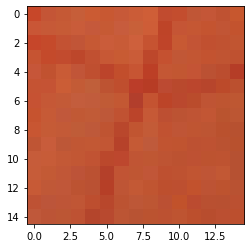

In [10]:
plt.imshow(train_data_images[1])

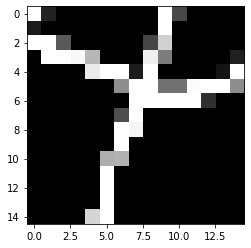

In [9]:
plt.imshow(train_target_images[1], cmap='gray')

In [8]:
train_data[0]

array([0.43419843, 0.43422824, 0.44428157, 0.44316549, 0.44597098,
       0.45605412, 0.46054118, 0.46001333, 0.46142   , 0.46727608,
       0.47036431, 0.47624314, 0.47457647, 0.48044745, 0.47260431,
       0.43393059, 0.44568824, 0.45436471, 0.44822588, 0.45605412,
       0.46054902, 0.46616   , 0.46645765, 0.47121255, 0.48408627,
       0.48662392, 0.48380353, 0.4899651 , 0.49527059, 0.49079843,
       0.45017529, 0.45802627, 0.46304902, 0.46897255, 0.4756698 ,
       0.4854851 , 0.47460627, 0.47937608, 0.48693647, 0.49081333,
       0.49919216, 0.48744235, 0.49724275, 0.49443725, 0.49219725,
       0.45661961, 0.4616651 , 0.46727608, 0.47707647, 0.49668431,
       0.49445922, 0.483     , 0.49195216, 0.49838157, 0.49363373,
       0.50399961, 0.49809098, 0.50144706, 0.4969749 , 0.49250275,
       0.46333176, 0.46613725, 0.48717451, 0.48994235, 0.49531529,
       0.50007804, 0.49222   , 0.49700471, 0.49896196, 0.50512353,
       0.50398471, 0.50033098, 0.51460353, 0.50257804, 0.48745

In [ ]:
train_data[1].shape

In [9]:
train_data.shape

(819896, 225)

In [10]:
# np.stack(np.asarray(train_data), axis=1)[0].shape

In [11]:
classifier = init_knn_classifier(train_data, train_target)

In [12]:
j = 3000
predictions = classifier.predict(test_data[0:j])

In [13]:


tp, fp, fn, tn = 0, 0, 0, 0
for pred, targ in zip(predictions, test_target[:j]):
    if pred:
        if targ:
            tp += 1
        else:
            fp += 1
    else:
        if targ:
            fn += 1
        else:
            tn += 1

accuracy = (tp + tn) / (tn + fn + tp + fp)
sensitivity = tp / (tp + fn)
specificity = tn / (fp + tn)
geometric = float(gmean([sensitivity, specificity]))

stats = [accuracy, sensitivity, specificity, geometric]

stat_names = ['Accuracy', 'Sensitivity', 'Specificity', 'Geometric']
for i, name in enumerate(stat_names):
    print(f"{name}: {stats[i]}")

Accuracy: 0.9516666666666667
Sensitivity: 0.5969696969696969
Specificity: 0.9955056179775281
Geometric: 0.7708999202851663


1.0


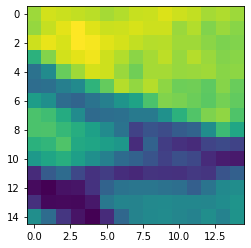

In [14]:
j, s = 0, 0
shift = 33
while predictions[j] != 1 or s < shift:
    j += 1
    s += 1

img = test_data[j]
m = np.sqrt(img.size).astype('int32')
img = img.reshape((m, m))
print(predictions[j])
plt.imshow(img)

Próba utworzenia maski

In [15]:
i = 7
input_img = np.asarray(load_image(get_image_paths(data_dir)[i]))
input_slices = get_input_features(data_images[256*256*(i-1):256*256*i])
target_img = np.asarray(load_image(get_image_paths(target_dir)[i]))

predicted_vector = classifier.predict(input_slices)

In [16]:
np.sum(predicted_vector)

5657.0

In [17]:
predicted_vector.shape

(65536,)

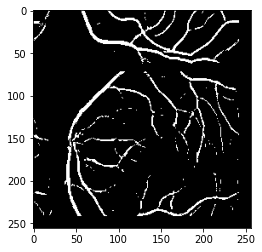

In [18]:
m = 256
predicted_image = np.zeros((m, m))

i = 0
for x in range(m - slice_size + 1):
    for y in range(m - slice_size + 1):
        predicted_image[x, y] = predicted_vector[i]
        i += 1
plt.imshow(predicted_image, cmap="gray")

In [20]:
# def foo(image: np.ndarray, slice_size: int):
#     width, height = image.shape[0], image.shape[1]
#
#     new_width, new_height = width+slice_size*2, height+slice_size*2
#     new_img = np.zeros((new_width, new_height))
#
#     new_img[slice_size:-slice_size, slice_size:-slice_size] = image
#
#     slices = []
#     for i in range(slice_size - 1, height - slice_size + 1):
#         for j in range(slice_size - 1, width - slice_size + 1):
#             slices.append(image[i:i+slice_size, j:j+slice_size])
#
#     return slices

In [21]:
# plt.imshow(foo(cv2.resize(target_img, (256, 256)), slice_size))

In [22]:
train_data_images[0].shape
features = [ft_ext.get_features(image) for image in test_data_images]
# features = np.stack(np.asarray(features), axis=0)
print(np.array(features).shape)


(351384, 225)


In [23]:
np.array(features).shape

(351384, 225)

In [24]:
# print(features)

In [25]:
# np.array(features)

In [26]:
# len(features[0])

In [27]:
# features[0]

In [28]:
# len(features[0])

In [29]:
# def get_input_features_2(data_images: list) -> np.ndarray:
#     features = [ft_ext.get_features(image) for image in data_images]
#     features = np.stack(np.asarray(features), axis=1)[0]
#     # features.reshape(len(data_images), features.shape[2])
#     return features

In [30]:
# train_data= get_input_features_2(train_data_images)


In [31]:
get_input_features([data_images[33]]).shape

(1, 225)

Opis podejścia